<a href="https://colab.research.google.com/github/illusoryTwin/introduction-to-robotics/blob/control/MozhegovaEkaterina_Control_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stabilization of Cart Pole system**:
> Consider cart pole system:
>
>
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1O1iM6MByfMyrO0txAMFb_miOqPNzFAvm" align="center" hspace="350px" vspace="0px"></p>
>
>
> Do the following:
>*   1) Design the linear feedback controller using linearization of the cart-pole dynamics.
>*   2) Simulate the response of your controller on the linearized and nonlinear system, compare the results.
>*   3) Taking into account that $y = Cx$ is measured, design observer and linear control that uses observer state.
>*   4) Simulate the nonlinear system with the observer and controller, show the difference between the actual motion of the nonlinear system and its estimate produced by teh observer.
>
> [Here is the great illustration of the hardware implemintation of the cart-pole](https://www.youtube.com/shorts/NJxBJ2LJY7w)


##**System Dynamics**:

Recall the dynamics of cart-pole system:
\begin{equation}
\begin{cases}
\left(M+m\right){\ddot {p}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
L \ddot{\theta}- g\sin \theta =\ddot{p} \cos \theta  \\
\end{cases}
\end{equation}

where $\theta$ is angle of the pendulum measured from the upper equilibrium and $p$ is position of cart


Choosing the state to be $\mathbf{x} = [\theta, \dot{\theta}, p, \dot{p}]^T$One may rewrite this dynamics in the state-space form as:
\begin{equation}
\mathbf{\dot{x}} =
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} \\
\dot{p} \\
\ddot{p}
\end{bmatrix}
=
\begin{bmatrix}
\dot{\theta} \\
\frac{(M+m)g \sin \theta - mL \dot{\theta}^2 \sin\theta \cos\theta}{(M + m\sin^2 \theta)L} \\
\dot{x} \\
\frac{mg\sin\theta \cos\theta - mL\dot{\theta}^2 \sin \theta}{M + m\sin^2 \theta} \\
\end{bmatrix}
+
\begin{bmatrix}
0 \\
\frac{\cos\theta}{(M + m\sin^2 \theta)L} \\
0 \\
\frac{1}{M + m\sin^2 \theta} \\
\end{bmatrix} u
\end{equation}


###**System parameters**:
Let us choose the following parameters:

In [7]:
m = 0.5 # mass of pendulum bob
M = 2 # mass of cart
pendulumn_length = 0.3 # length of pendulum
g = 9.81 # gravitational acceleration


####**Nonlinear dynamics**:

First of all let us define the nonlinear system in form $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, \mathbf{u})$ :

In [3]:
import numpy as np
from math import cos, sin

import matplotlib.pyplot as plt

# sin, cos = np.sin, np.cos
# Nonlinear cart-pole dynamics
def f(x, u):
    theta, dtheta, p, dp = x
    u = u[0]

    denominator = M + m*(sin(theta)**2)
    ddtheta = ((M + m)*g*sin(theta) - m* pendulumn_length * dtheta**2 *sin(theta) * cos(theta) + cos(theta)*u)/(denominator * pendulumn_length)
    ddp = (m*g*sin(theta)*cos(theta) - m* pendulumn_length * dtheta**2 *sin(theta) + u)/denominator

    dx = np.array([dtheta, ddtheta, dp, ddp])
    return dx

x0 = np.array([1, # Initial pendulum angle
      0, # Initial pendulum angular speed
      1, # Initial cart position
      0]) # Initial cart speed
u0 = np.array([0])
print(f(x0, u0))

[ 0.         29.22225161  0.          0.947331  ]


###**Linearized Dynamics**:

Liniarization around the upper equilibrium $\mathbf{x} = [0,0,0,0]$ yields:

\begin{equation}
\mathbf{\dot{x}} =
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} \\
\dot{p} \\
\ddot{p}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 & 0 & 0\\
\frac{(M+m)}{M}\frac{g}{L} & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\frac{m}{M}g & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
\theta \\
\dot{\theta} \\
p \\
\dot{p}
\end{bmatrix}
+
\begin{bmatrix}
0 \\
\frac{1}{ML} \\
0 \\
\frac{1}{M}
\end{bmatrix}
u
\end{equation}

In [4]:
# System matrix
A = np.array([[0, 1, 0, 0],
             [(M + m)*g /(M*pendulumn_length), 0, 0, 0],
             [0,0,0,1],
             [m*g/M, 0, 0, 0]])
# Input matrix
B = np.array([[0],
             [1/(M*pendulumn_length)],
             [0],
             [1/M]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])

###**Controller Design**:

Let us design the controller for linearized plant by placing poles (eigen values) on the left-hand side of complex plane:


Insert your control design / observer design code here.

Check eigenvalues of the closed-loop system for 1) closed-loop for the case when full state information is availible and no observer is used, 2) when only measurement y = C*x is availible and an observer is used.

### Simulation with observer

Insert your code simulating the behaviour of the nonlinear system with an observer. Plot the results, compare state estimatio and actual state of the system.

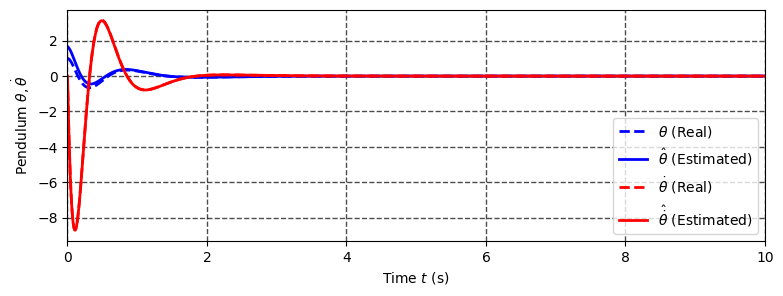

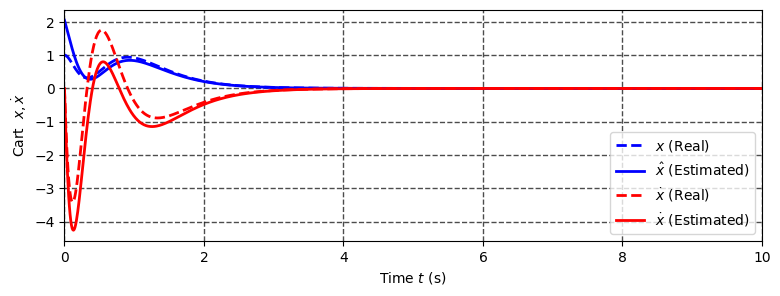

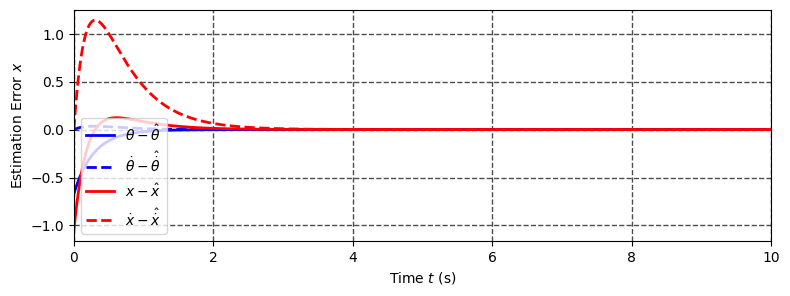

In [15]:
from scipy.linalg import solve_continuous_are
from scipy.integrate import odeint
from matplotlib.pyplot import *
import numpy as np
from scipy.signal import place_poles
from scipy.linalg import solve_continuous_are

# Define time
t0 = 0
tf = 10
N = 1000
t = np.linspace(t0, tf, N)


# Define desired eigenvalues for the observer
desired_observer_poles = [-5, -4, -2, -3]
pole_placement_observer = place_poles(A.T, C.T, desired_observer_poles)
L = pole_placement_observer.gain_matrix.T


# Define desired eigenvalues for the controller
desired_controller_poles = [-5, -6, -7, -8]
pole_placement_controller = place_poles(A, B, desired_controller_poles)
K = pole_placement_controller.gain_matrix


def observer_controller(state, t, system_param, observer_params):
    x, x_hat = np.split(state,2)

    A = system_param['A']
    B = system_param['B']
    K = system_param['K']

    C = observer_params['C']
    L = observer_params['L']
    A_obs = observer_params['A']

    u = -np.dot(K,x_hat)

    dx = np.dot(A,x) + np.dot(B, u)

    y = np.dot(C, x)

    #
    y_hat = np.dot(C, x_hat)
    e = y -  y_hat

    dx_hat = np.dot(A_obs,x_hat) + np.dot(B, u) + np.dot(L, e)
    # print(dx_hat)

    #
    dstate = np.hstack((dx, dx_hat))
    # dstate = dx, dx_hat
    return dstate


# System matrices
A = np.array([[0, 1, 0, 0],
             [(M + m)*g /(M*pendulumn_length), 0, 0, 0],
             [0,0,0,1],
             [m*g/M, 0, 0, 0]])

B = np.array([[0],
             [1/(M*pendulumn_length)],
             [0],
             [1/M]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])

A_o = A

system_params = {'A':A,'B':B,'K':K}
observer_params = {'A':A_o,'C':C, 'L':L}

# Set initial state
x_real_0 = [1, 0, 1, 0]
x_hat_0 = [1.67, 0, 2.05, 0]
state_0 = np.hstack((x_real_0, x_hat_0))


state_sol = odeint(observer_controller, state_0, t, args=(system_params, observer_params, )) # integrate system "sys_ode" from initial state $x0$
x_real, x_hat = np.split(state_sol, 2, axis=1)

theta, dtheta, x, dx = np.split(x_real, 4, axis = 1)

theta_hat, dtheta_hat, x_hat, dx_hat = np.split(x_hat, 4, axis = 1)


plt.figure(figsize=(9, 3))
plt.plot(t, theta, 'b--', linewidth=2.0, label=r'$\theta$ (Real)')
plt.plot(t, theta_hat, 'b', linewidth=2.0, label=r'$\hat{\theta}$ (Estimated)')
plt.plot(t, dtheta, 'r--', linewidth=2.0, label=r'$\dot{\theta}$ (Real)')
plt.plot(t, dtheta_hat, 'r', linewidth=2.0, label=r'$\hat{\dot{\theta}}$ (Estimated)')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.grid(True)
plt.xlim([t0, tf])
plt.ylabel(r'Pendulum $\theta,\dot{\theta}$')
plt.xlabel(r'Time $t$ (s)')
plt.legend()
plt.show()



figure(figsize=(9, 3))
plot(t, x, 'b--', linewidth=2.0, label=r'$x$ (Real)')
plot(t, x_hat, 'b', linewidth=2.0, label=r'$\hat{x}$ (Estimated)')
plot(t, dx, 'r--', linewidth=2.0, label=r'$\dot{x}$ (Real)')
plot(t, dx_hat, 'r', linewidth=2.0, label=r'$\dot{x}$ (Estimated)')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Cart  $x,\dot{x}$')
xlabel(r'Time $t$ (s)')
legend()
show()

plt.figure(figsize=(9, 3))
plt.plot(t, theta - theta_hat, 'b', linewidth=2.0, label=r'$\theta - \hat{\theta}$')
plt.plot(t, dtheta - dtheta_hat, 'b--', linewidth=2.0, label=r'$\dot{\theta} - \hat{\dot{\theta}}$')
plt.plot(t, x - x_hat, 'r', linewidth=2.0, label=r'$x - \hat{x}$')
plt.plot(t, dx - dx_hat, 'r--', linewidth=2.0, label=r'$\dot{x} - \hat{\dot{x}}$')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Estimation Error ${x}$')
plt.xlabel(r'Time $t$ (s)')
plt.show()


# Control for a full-state system
### In order for system to be stable, all the eigenvalues have to negative. So, the current system is not stable

In [30]:
# Let's check the stability of the original system
from numpy import linalg

eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([ 0.        ,  0.        ,  6.39335593, -6.39335593])

### Deriving linear control for the full-state system via Pole Placement

In [31]:
import numpy as np
from scipy.linalg import solve_continuous_are
from scipy.signal import place_poles

# Define system matrices A and B
A = np.array([[0, 1, 0, 0],
              [(M + m)*g /(M*pendulumn_length), 0, 0, 0],
              [0, 0, 0, 1],
              [m*g/M, 0, 0, 0]])

B = np.array([[0],
              [1/(M*pendulumn_length)],
              [0],
              [1/M]])


desired_poles = [-2, -3, -4, -5]
pole_placement = place_poles(A, B, desired_poles)
K = pole_placement.gain_matrix

eigenvalues, eigenvectors = np.linalg.eig(A - B@K)

print(f"Eigenvalues:\n{eigenvalues}")

Eigenvalues:
[-5. -4. -3. -2.]


##**Simulation**:
We proceed with the simulation of designed controller, firstly we will define the simulation parameters:

In [32]:
from scipy.integrate import odeint

# Time settings
t0 = 0 # Initial time
tf = 10 # Final time
N = 1000 # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

# Define initial point
theta_0 = 0.4
p_0 = 0.1

# Set initial state
x0 = np.array([theta_0, # Initial pendulum angle
      0, # Initial pendulum angular speed
      p_0, # Initial cart position
      0]) # Initial cart speed


####**Linearized dynamics**:
Now let us simulate the response of linear controller on the **linearized** system:

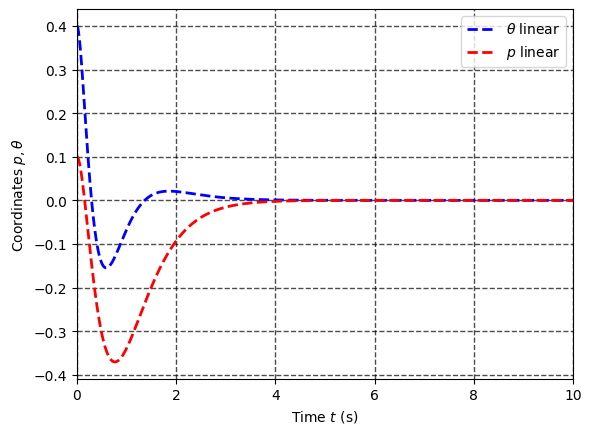

In [33]:
# import integrator routine
from scipy.integrate import odeint

A = np.array([[0, 1, 0, 0],
              [(M + m)*g /(M*pendulumn_length), 0, 0, 0],
              [0, 0, 0, 1],
              [m*g/M, 0, 0, 0]])

B = np.array([[0],
              [1/(M*pendulumn_length)],
              [0],
              [1/M]])


# Define the linear ODE to solve
def linear_ode(x, t, K):
    # Linear controller
    u = - np.dot(K,x)
    # Linearized dynamicssystem
    dx = np.dot(A,x) + np.dot(B,u)
    return dx


# K = solve_continuous_are(A, B, Q, R)

# integrate system "sys_ode" from initial state $x0$
# x_l = odeint(nonliear_ode, x0, t, args=(K,))
x_l = odeint(linear_ode, x0, t, args=(K,))

# integrate system "sys_ode" from initial state $x0$
# x_l = odeint(linear_ode, x0, t, args=(A, B, K,))
theta_l, dtheta_l, p_l, dp_l = x_l[:,0], x_l[:,1], x_l[:,2], x_l[:,3]
# Plot the resulst
plt.plot(t, theta_l, 'b--', linewidth=2.0, label = r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label = r'$p$ linear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

### Introducing linear control into the nonlinear system via LQR
*(OPTIONAL)*

K [[258.7652225   41.45783735  -9.16054991 -23.76153926]
 [ 41.45783735   6.74094427  -1.59971333  -4.1487144 ]
 [ -9.16054991  -1.59971333   2.76852949   3.33237777]
 [-23.76153926  -4.1487144    3.33237777   8.29198901]]


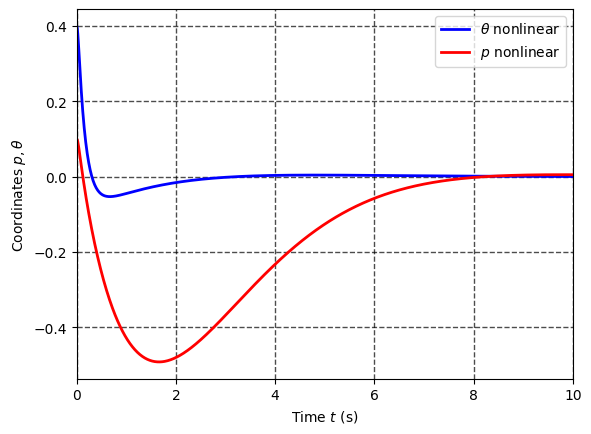

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles


# Define the params
m = 0.5 # mass of pendulum bob
M = 2 # mass of cart
pendulum_length = 0.3 # length of pendulum
g = 9.81 # gravitational acceleration

# Nonlinear dynamics function
def nonliear_ode(x, t, K):

    # Linear controller
    u = - np.dot(K,x)

    # Nonlinear dynamics
    dx = f(x, u)

    return dx

# Initial conditions
x0 = np.array([0.4, 0.0, 0.1, 0.0])  # Initial state
u0 = np.array([0.0, 0.0, 0.0, 0.0])  # Initial control input


# Define time interval
dt = 0.01
t_final = 15.0  # Final time
num_steps = int(t_final / dt)  # Number of time steps


Q = np.diag([1, 1, 1, 1])
R = np.array([[1]])

# Linearized system matrices
A = np.array([[0, 1, 0, 0],
              [(M + m)*g /(M*pendulum_length), 0, 0, 0],
              [0, 0, 0, 1],
              [m*g/M, 0, 0, 0]])
B = np.array([[0],
              [1/(M*pendulum_length)],
              [0],
              [1/M]])

# Compute LQR gain matrix
K = solve_continuous_are(A, B, Q, R)
print("K", K)


# Simulation
t_values = np.linspace(0.0, t_final, num_steps + 1)
x_values = np.zeros((num_steps + 1, len(x0)))
x_values[0] = x0

x_values=odeint(nonliear_ode, x0, t, args=(K,))


theta_nl, dtheta_nl, p_nl, dp_nl = x_values[:,0], x_values[:,1], x_values[:,2], x_values[:,3]
# Plot the resulst
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

### Now we will simulate similarly to linear case while using the same gains $\mathbf{K}$:

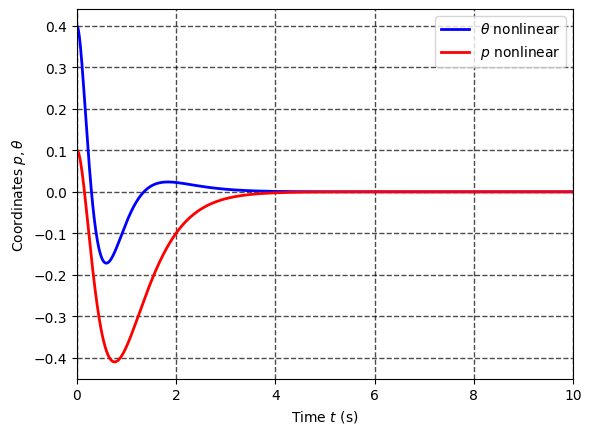

In [34]:
def nonliear_ode(x, t, K):

    # Linear controller
    u = - np.dot(K,x)

    # Nonlinear dynamics
    dx = f(x, u)

    return dx

desired_poles = [-2, -3, -4, -5]
pole_placement = place_poles(A, B, desired_poles)
K = pole_placement.gain_matrix


# integrate system "sys_ode" from initial state $x0$
x_nl = odeint(nonliear_ode, x0, t, args=(K,))
theta_nl, dtheta_nl, p_nl, dp_nl = x_nl[:,0], x_nl[:,1], x_nl[:,2], x_nl[:,3]
# Plot the resulst
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()


###**Comparison**:
One may compare the linear and nonlinear responses by plotting them together:

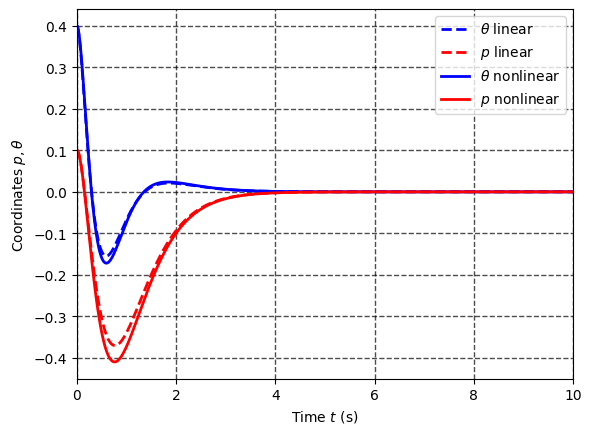

In [35]:
# theta_l, p_l - values of theta and p for the linear system
# theta_nl, p_nl - values of theta and p for the nonlinear system

plt.plot(t, theta_l, 'b--', linewidth=2.0, label = r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label = r'$p$ linear')
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

# Animation

In [36]:
p = p_nl
theta = theta_nl
time = t

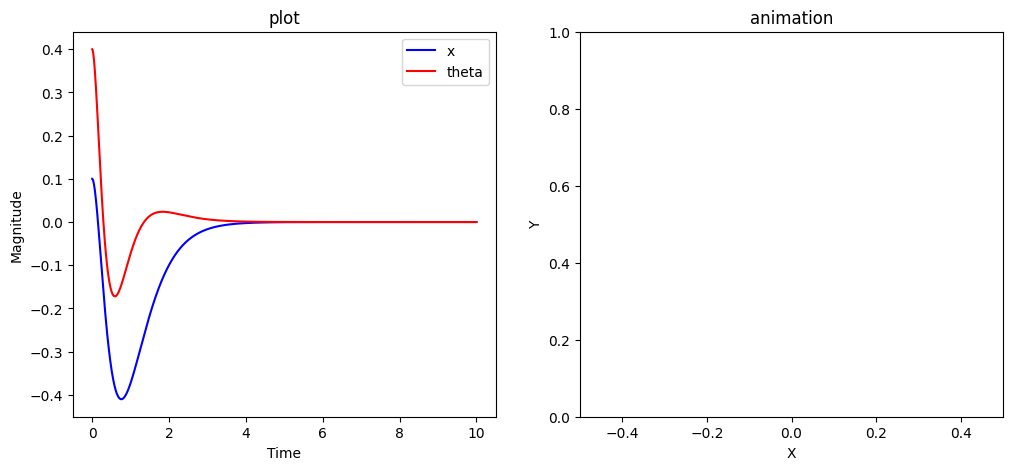

In [42]:
%matplotlib inline

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
# ax1.set_xlim(( 0, 2))
# ax1.set_ylim((-0.3, 0.3))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-0.5,0.5))
ax2.set_ylim((0,1))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('animation')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('plot')
line_x,     = ax1.plot(time, p, 'b')     # ax.plot returns a list of 2D line objects
line_theta, = ax1.plot(time, theta, 'r')
point_x,     = ax1.plot([], [], 'g.', ms=20)
point_theta, = ax1.plot([], [], 'g.', ms=20)

draw_cart,  = ax2.plot([], [], 'b', lw=2)
draw_shaft, = ax2.plot([], [], 'r', lw=2)

ax1.legend(['x','theta']);

shaft_l = 0.3
cart_l = 0.1
cart_x = np.array([-1, -1, 1, 1, -1])*cart_l
cart_y = np.array([ 0,  1, 1, 0,  0])*cart_l


# animation function. This is called sequentially
def drawframe(n):

    shaft_x = np.array([ p[n],  p[n] + shaft_l*sin(theta[n] )])
    shaft_y = np.array([ cart_l/2,  cart_l/2 + shaft_l*cos(theta[n] )])

    line_x.set_data(time, p)
    line_theta.set_data(time, theta)
# system
    point_x.set_data(time[n], p[n])
    point_theta.set_data(time[n], theta[n])

    draw_cart.set_data(cart_x+p[n], cart_y)
    draw_shaft.set_data(shaft_x, shaft_y)

    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (draw_cart,draw_shaft)

In [43]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=200, interval=20, blit=True)

<ipython-input-42-f248a9fb8fb2>:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_x.set_data(time[n], p[n])
<ipython-input-42-f248a9fb8fb2>:50: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_theta.set_data(time[n], theta[n])


## Here we try to make a video of the cart-pole as it moves

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())